### An example of working with time series dagta.
#### Dataset: bicycle count on Seattle's Fremont Bridge (automated bicycle counter, installed in late 2012, which has inductive sensors on the east and west sidewalks of the bridge. )

In [7]:
import requests

# URL of the CSV file
url = 'https://raw.githubusercontent.com/amankharwal/Fremont-Bridge-Bicycle-Counts/master/fremont-bridge.csv'

# Send an HTTP GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Open a file in binary write mode
    with open('data.csv', 'wb') as f:
        # Write the content of the response to the file
        f.write(response.content)
    print('CSV file downloaded successfully')
else:
    print('Failed to download CSV file')


CSV file downloaded successfully


In [12]:
import pandas as pd
data = pd.read_csv("data.csv", index_col= 'Date', parse_dates=True)
data['Total'] = data['West']+data['East'] # Further process of dataset by adding a Total column
data.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0


In [13]:
# Summary Statistics for dataset
data.dropna().describe()

,West,East,Total
count,45976.000000,45976.000000,45976.000000
mean,54.712306,55.479315,110.191622
std,72.935797,80.232055,139.189603
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,29.000000,28.000000,60.000000
75%,72.000000,68.000000,144.000000
max,854.000000,717.000000,1165.000000


## Visualizing the data

Text(0, 0.5, 'Hourly Bicycle Count')

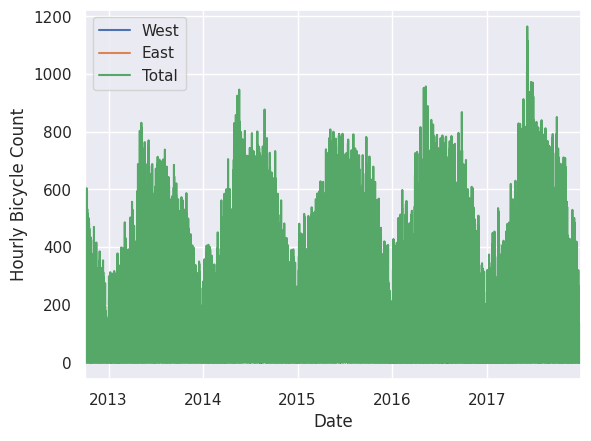

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
# import seaborn
# seaborn.set()
data.plot()
plt.ylabel('Hourly Bicycle Count')


### The plot about is a very dense presentation to make much sense of data. We do resampling by week below to gain more insight

Text(0, 0.5, 'Hourly Bicycle Count')

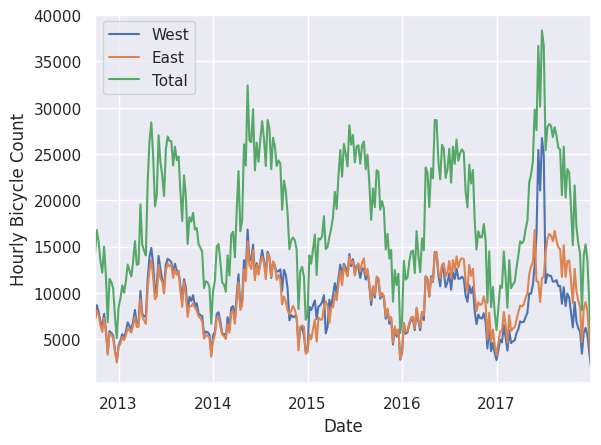

In [24]:
hourly = data.resample("W").sum()
hourly.plot()
plt.ylabel('Hourly Bicycle Count')

## the plot above shows some interesting seasonal trends: as it is expected, more biking during summer time than winter. Also, within a season the bicycle use varies from week to week 

#### Another way that helps to have a better presentation of data is aggregating data for every 30-day. for this purpose, we can use pd.rolling_mean() function

Text(0, 0.5, 'mean monthly count')

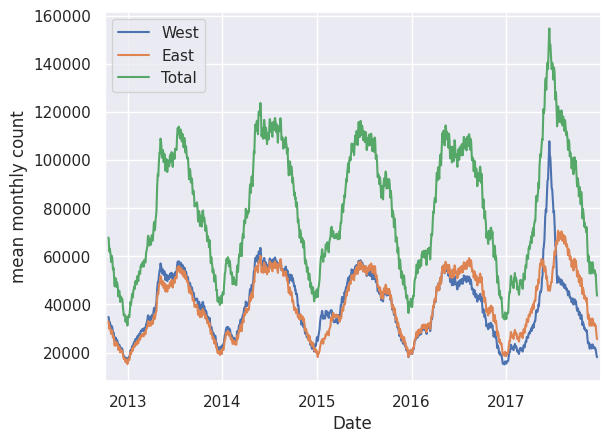

In [29]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot()
plt.ylabel('mean monthly count')


### Smoothed data views are useful for the general trend in the data.  We can do this using the GroupBy functionality

Text(0, 0.5, 'Traffic according to time')

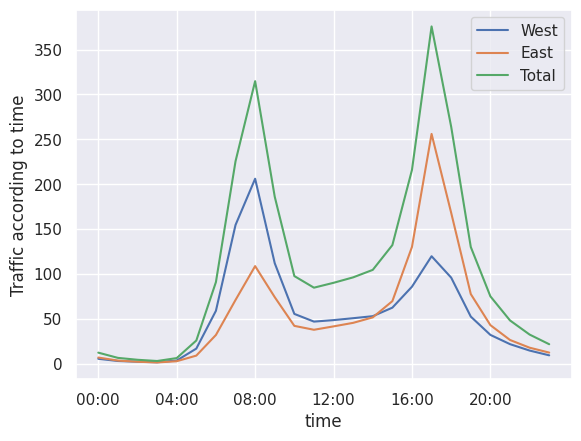

In [31]:
import numpy as np
by_time = data.groupby(data.index.time).mean()# group by time and then take the mean of each group
hourly_ticks = 4*60*60*np.arange(6) # ticks for every four hours (6 intervals of four hours each. 4*60*60 conertss each interval from seconds to hours
by_time.plot(xticks=hourly_ticks)
plt.ylabel("Traffic according to time")
